In [1]:
import qdpm
import numpy as np
import matplotlib.pyplot as plt

In [104]:
rabi_time_exp = qdpm.Experiment(r'O:\68707\BF2222\LABVIEWdata\Cooldown20210114\Heterodyne\Nb_SWIPHT_MB_W8_180nm\Dipole Calib from RabiTime_-10dB_drive_atten\10--11\2021_03_03_12_50_39')

In [105]:
qubit_idx = 1

In [106]:
tau = np.concatenate((np.array([0]), np.linspace(0.01, 0.2, rabi_time_exp.scan_size[0]-1))) 
tau = np.linspace(0.01, 0.5, rabi_time_exp.scan_size[0]-1)

In [107]:
clf = qdpm.SingleQubitClassifier(rabi_time_exp, qubit=qubit_idx)
prediction = clf.predict()
population = prediction.mean(axis=1)

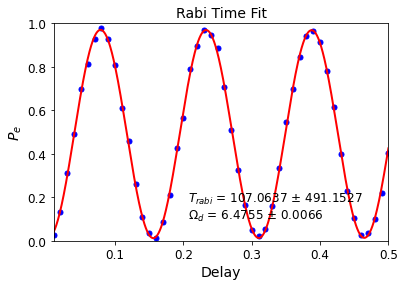

In [108]:
fig, ax = plt.subplots()
rabi_time_fit = qdpm.RabiTimeFit(tau, population[1:], make_plots=True, ax=ax)
ax.set_xlim(tau[0], tau[-1])
ax.set_ylim(0, 1)
fig.savefig(rabi_time_exp.path.joinpath('RabiTime.png'))
plt.show()

In [109]:
print(f"Rabi rate: {rabi_time_fit.fit_params['f']:.4f} MHz")

Rabi rate: 6.4755 MHz


In [110]:
rabi_time_fit.fit_params

{'y0': 0.49094084770845625,
 'A': 0.479409268437059,
 'T': 107.06368951954293,
 'f': 6.475460335597636,
 'phi': 3.080745963967049}

In [96]:
rabi_time_fit.fit_errors

{'y0': 0.001647907357743632,
 'A': 0.004725000408872656,
 'T': 9.828839484692868,
 'f': 0.005430186048525763,
 'phi': 0.009846832620235123}